# Problem Statement

We want to predict house prices from Mumbai using different predictor variables.

# Goal 

The goal of this statistical analysis is to help us understand the relationship between house features and how these variables are used to predict house price.

# Dataset 

The dataset contains 6347 observations of house prices from different locations of Mumbai. Corresponding to each house prices, data of 17 other variables are available on which price is suspected to depend.

# Data Dictionary 

We are using "Mumbai house price" data. This Dataset contains 6347 observations and 18 total columns.we have 'Price' as independent variable and 17 other variables other than Price as dependent variables.

1. Price- Price of house
2. Area- In which Area the house lies in
3. Location- Location of the house
4. No.of Bedrooms- Total no. of bedrooms in the house
5. New/Resale- House is new or resale
6. Gymnasium- Gym available or not
7. Lift Available- Lift available or not
8. Car Parking- Car parking available or not
9. Maintenance Staff- Maintenance staff available or not
10. 24x7 Security- 24x7 security available or not
11. Children's Play Area- Children's Play Area available or not
12. Clubhouse- Clubhouse available or not
13. Intercom- Intercom available or not
14. Landscaped Gardens- Landscaped Gardens available or not
15. Indoor Games- available or not
16. Gas Connection- Gas Connection available or not
17. Jogging Track- Jogging Track available or not
18. Swimming Pool- Swimming Pool available or not


# Framing Problem 

For now, we can categorize our Machine Learning System as:
1. Supervised Learning Task- we are given labled training data(e.g. we alredy know some of the house prices)
2. Regression task- our model is expected to predict the house prices using given features where house price is a continuous variable.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

### Importing dataset 

In [2]:
df = pd.read_csv("Mumbai1.csv",header=0,index_col=0)

In [3]:
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
df.shape

(6347, 18)

## Exploratory Data Anaysis(EDA) and Data Preprocessing

In [5]:
#checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

#### There are no missing values in any variable.

In [6]:
#Performing EDD(Exteneded Data Dictionary)
df.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Price distribution')

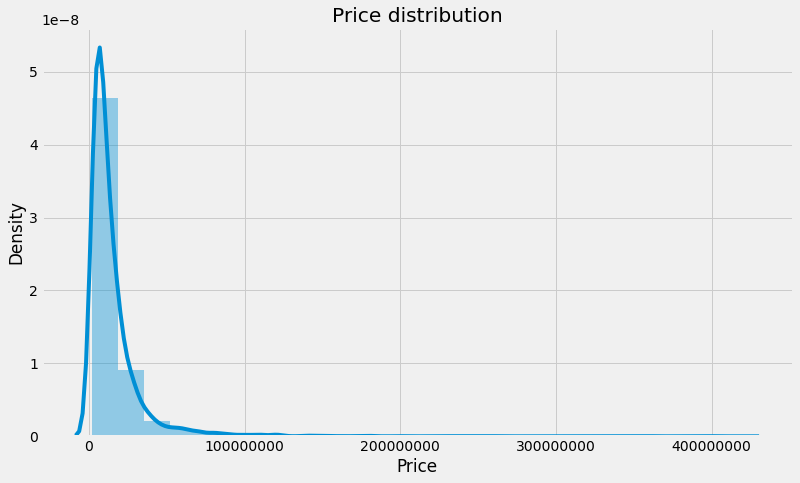

In [7]:
#There is a noticable difference between mean and meadian of Price variable 
#hence checking distribution of Price variable
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Price,bins=25)
plt.ticklabel_format(style='plain',axis='x')
plt.title("Price distribution")

In [8]:
print("Skew is:", df.Price.skew())
print("Kurtosis is:", df.Price.kurt())

Skew is: 6.823590994567408
Kurtosis is: 85.18853615580598


#### Observation - we can see that response variable "Price" is positively skewed(skewed to right) and it has presence of outliers and we have to remove it by taking log

In [9]:
#taking log to remove outliers
df.Price = np.log(df.Price)

Text(0.5, 1.0, 'Price distribution')

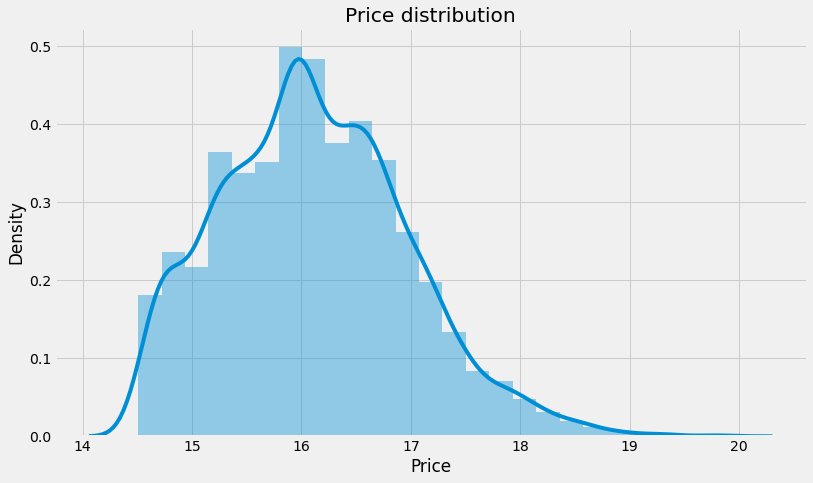

In [10]:
#again checking distribution of Price Variable
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Price,bins=25)
plt.ticklabel_format(style='plain',axis='x')
plt.title("Price distribution")

In [11]:
#again checking skewness
print("Skew is:", df.Price.skew())
print("Kurtosis is:", df.Price.kurt())

Skew is: 0.4097938316243601
Kurtosis is: 0.060595131242721756


#### Hence we normally distributed Price variable

<AxesSubplot:xlabel='Area'>

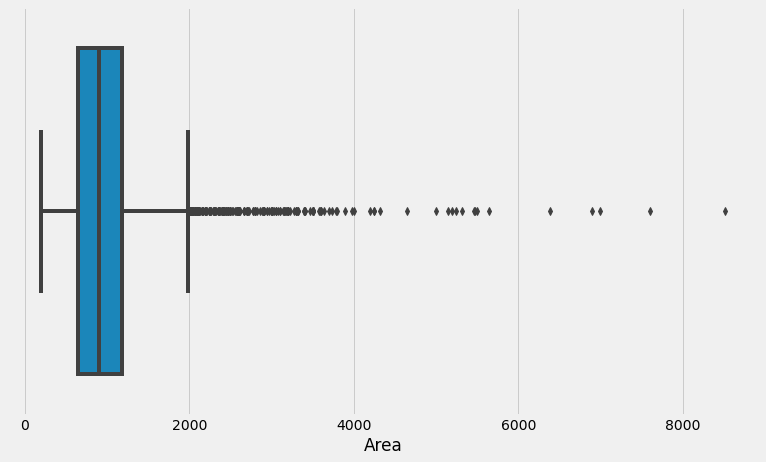

In [12]:
#checking for outliers in Area variable as there is noticable difference between distribution of 75% and max
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.boxplot(df.Area)

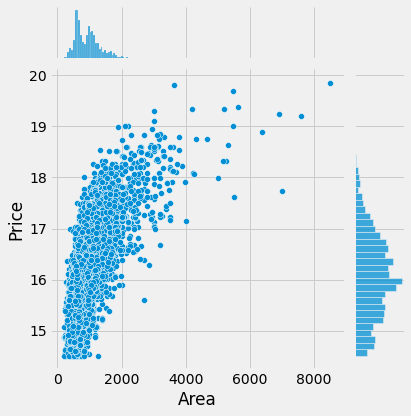

In [13]:
#plotting scatter plot between Area and Price to confirm outliers
sns.jointplot(x='Area',y='Price',data=df)

#### Observation - There are some outliers in Area variable and we can remove these outliers using log

In [14]:
#taking log to remove outliers
df.Area = np.log(df.Area)

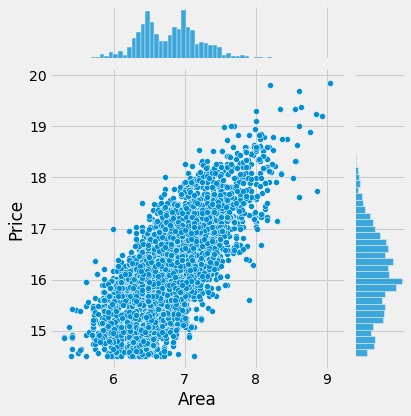

In [15]:
#plotting scatter plot of Area against Price variable
sns.jointplot(x='Area',y='Price',data=df)

#### Hence we removed outliers from Area variable 

In [16]:
#checking unique values of the variable "Location"
df['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [17]:
df['Location'].value_counts()

Kharghar                 533
Thane West               418
Mira Road East           390
Ulwe                     319
Borivali West            176
                        ... 
Rustomjee Global City      1
Kondivita Road             1
Sahkar Nagar               1
Rutu Enclave               1
Sector-6A Kamothe          1
Name: Location, Length: 413, dtype: int64

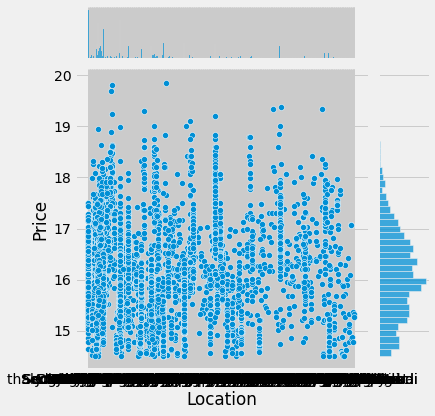

In [18]:
sns.jointplot(x='Location',y='Price',data=df)

#### Observation - Location variable is not that much important for response variable "Price". hence we will remove it from our dataset

In [19]:
#removing Location variable from our dataset
del df['Location']

In [20]:
df.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,15.394489,6.579251,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,15.319588,6.396930,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,15.717618,6.476972,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,15.319588,6.476972,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,15.424948,6.499787,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


#### Hence we deleted Location variable

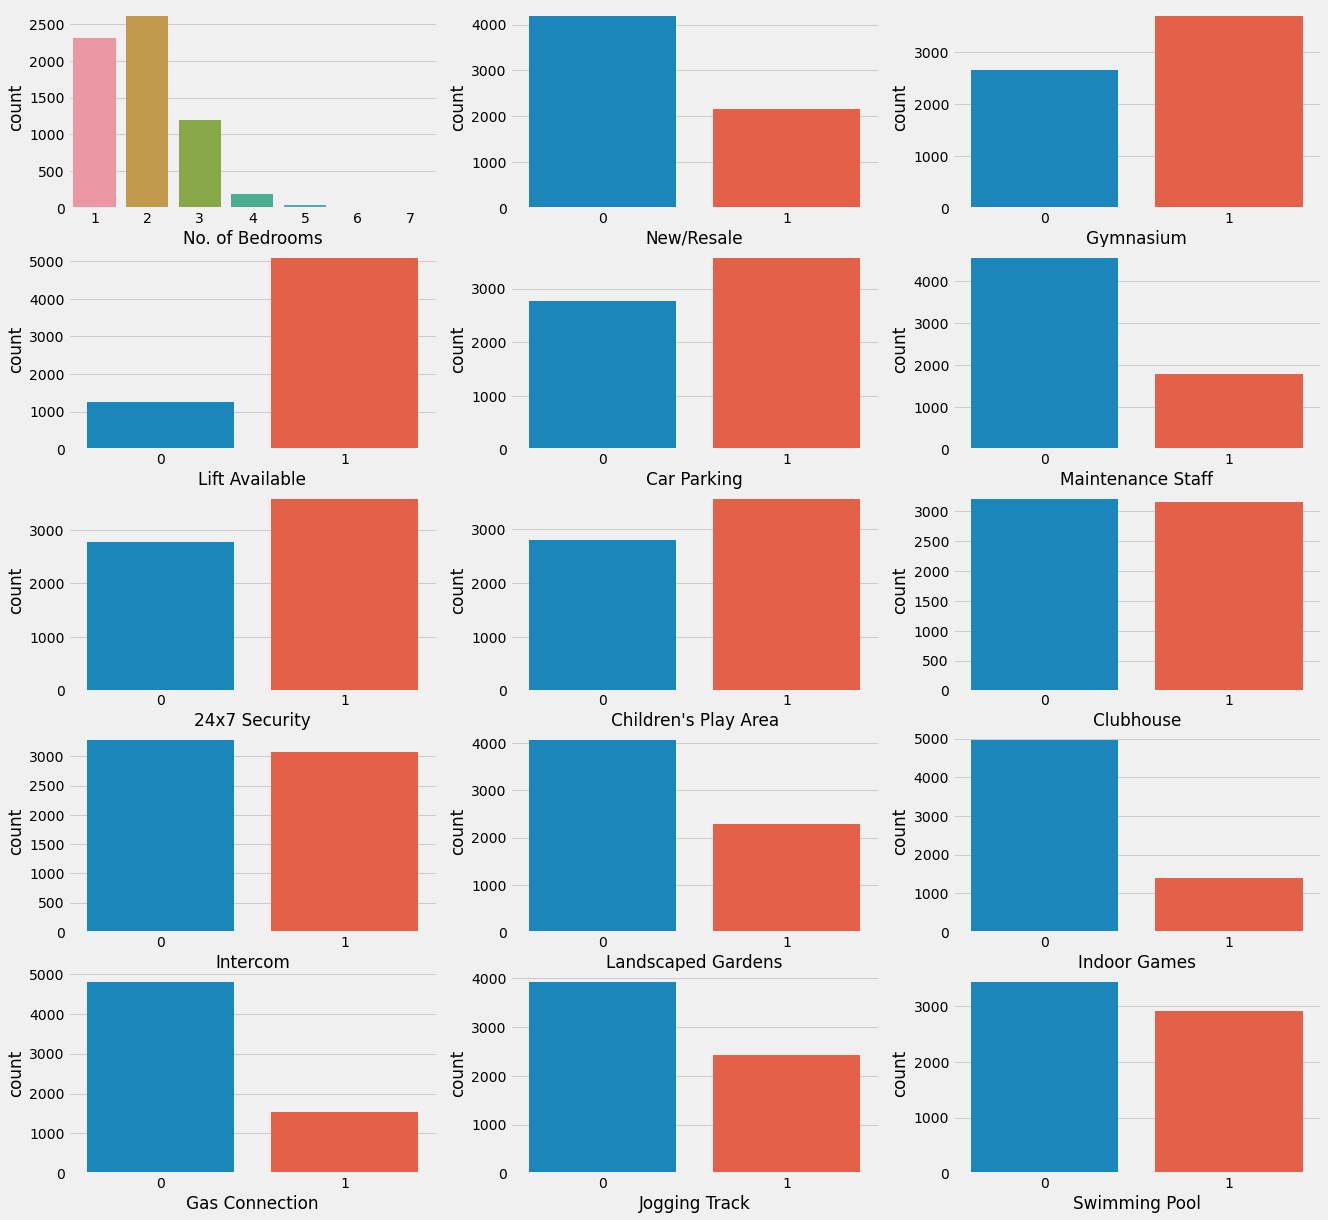

In [21]:
#plotting countplot for each categorical variable to interpret it
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
for variable, subplot in zip(df.columns[2:17], ax.flatten()):
    sns.countplot(df[variable], ax=subplot)

#### Observation - For No. of Bedrooms variable there are very few houses having 4,5,6,7 bedrooms. Maybe we can create single category for houses having 3,4,5,6,7 bedrooms. 

In [22]:
#creating single category for houses having 3,4,5,6,7 bedrooms.
df['No. of Bedrooms'] = df['No. of Bedrooms'].replace({3:'morethan3',4:'morethan3',5:'morethan3',6:'morethan3',7:'morethan3'})

In [23]:
df['No. of Bedrooms'].value_counts()

2            2601
1            2307
morethan3    1439
Name: No. of Bedrooms, dtype: int64

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='count'>

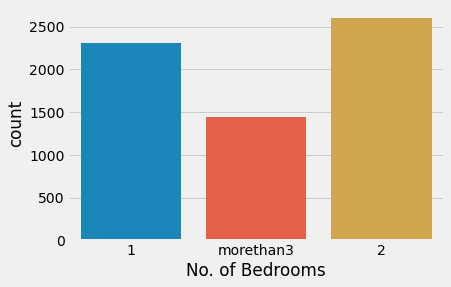

In [24]:
sns.countplot(df['No. of Bedrooms'])

In [25]:
#creating dummy variables for No. of Bedrooms
df = pd.get_dummies(df,drop_first=True)

In [26]:
df.head(10)

,Price,Area,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,No. of Bedrooms_2,No. of Bedrooms_morethan3
0,15.394489,6.579251,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,15.319588,6.396930,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,0
2,15.717618,6.476972,0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0
3,15.319588,6.476972,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0
4,15.424948,6.499787,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0
5,16.648724,7.600902,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1
6,16.341239,7.346010,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1
7,16.166886,7.222566,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1
8,16.166886,7.212294,0,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1
9,16.523561,7.426549,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1


### Correlation Analysis

In [27]:
df.corr()

,Price,Area,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,No. of Bedrooms_2,No. of Bedrooms_morethan3
Price,1.000000,0.723700,0.044516,0.190151,0.101333,0.083825,0.037889,0.074456,0.061865,0.155296,0.139714,0.073749,0.158204,0.196640,0.084308,0.214059,0.091899,0.585911
Area,0.723700,1.000000,0.030161,0.243186,0.129508,0.140823,0.099616,0.129891,0.131489,0.212207,0.182015,0.119534,0.167877,0.092052,0.139795,0.242588,0.123957,0.669720
New/Resale,0.044516,0.030161,1.000000,0.243751,0.105422,-0.024795,-0.235167,-0.002695,0.278907,0.269434,0.232293,0.196307,0.290162,-0.029659,0.227498,0.276606,0.033195,0.077941
Gymnasium,0.190151,0.243186,0.243751,1.000000,0.420770,0.332707,0.017514,0.382928,0.552648,0.756068,0.490203,0.423149,0.410831,0.098228,0.564443,0.722224,0.091459,0.165819
Lift Available,0.101333,0.129508,0.105422,0.420770,1.000000,0.259843,0.039136,0.258250,0.423847,0.407903,0.425870,0.280011,0.195335,0.205629,0.327393,0.341265,0.009917,0.084588
Car Parking,0.083825,0.140823,-0.024795,0.332707,0.259843,1.000000,0.513232,0.805328,0.087365,0.282532,0.110477,0.417677,0.281009,-0.101906,0.467630,0.284575,0.036676,0.079597
Maintenance Staff,0.037889,0.099616,-0.235167,0.017514,0.039136,0.513232,1.000000,0.477914,-0.190507,-0.041616,-0.088927,0.115207,0.026861,-0.111239,-0.011001,-0.078456,0.013606,0.031861
24x7 Security,0.074456,0.129891,-0.002695,0.382928,0.258250,0.805328,0.477914,1.000000,0.141747,0.332720,0.151153,0.436198,0.319371,-0.101166,0.539561,0.332387,0.014716,0.086424
Children's Play Area,0.061865,0.131489,0.278907,0.552648,0.423847,0.087365,-0.190507,0.141747,1.000000,0.603074,0.585449,0.432697,0.417242,0.187151,0.527821,0.592932,0.031110,0.094088
Clubhouse,0.155296,0.212207,0.269434,0.756068,0.407903,0.282532,-0.041616,0.332720,0.603074,1.000000,0.557319,0.450821,0.463670,0.130183,0.622441,0.752771,0.077614,0.146626


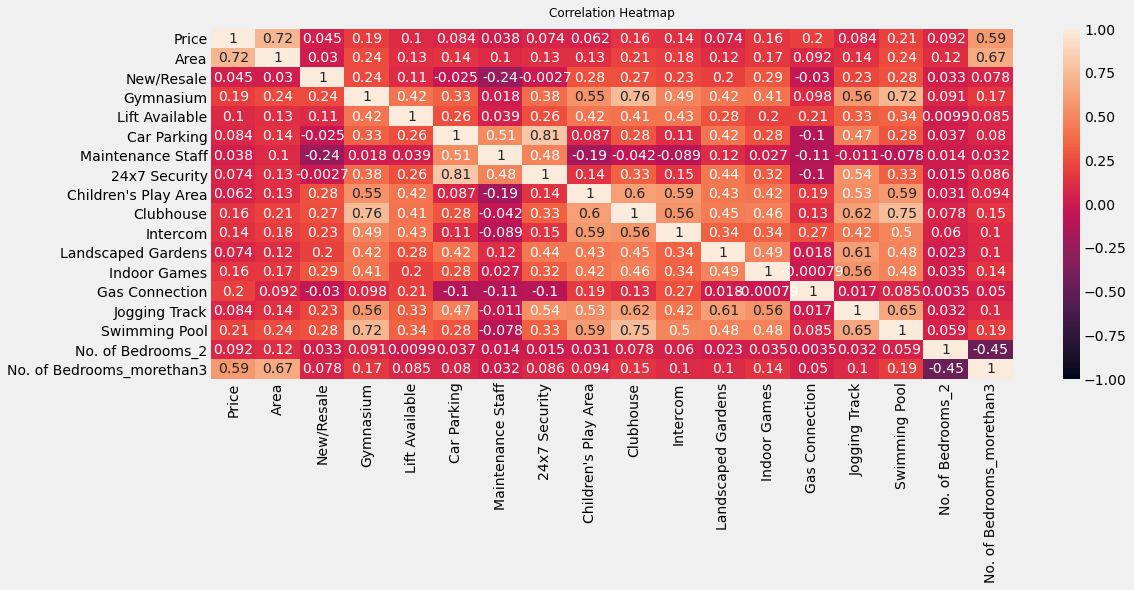

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Car parking and 24x7 Security have high correlation coefficient(0.81) and as 24x7 Security have low correlation coefficient with Price than Car Parking so we will delete 24x7 Security.

In [29]:
#deleting 24x7 Security variable
del df['24x7 Security']

In [30]:
df.head()

,Price,Area,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,No. of Bedrooms_2,No. of Bedrooms_morethan3
0,15.394489,6.579251,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1,15.319588,6.396930,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0
2,15.717618,6.476972,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0
3,15.319588,6.476972,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0
4,15.424948,6.499787,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0


## Test - Train Data Split

In [31]:
X = df.drop("Price",axis=1)

In [32]:
y = df["Price"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5077, 16), (1270, 16), (5077,), (1270,))

## Model building : Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
y_test_pred = lm.predict(X_test)

In [40]:
y_train_pred = lm.predict(X_train)

In [41]:
lm.coef_

array([ 7.75592609e-01, -1.08985289e-02,  3.60405200e-03,  4.07903599e-02,
        5.65983174e-03, -3.19741128e-02, -1.85335592e-01, -8.57432217e-02,
       -1.20018187e-04, -4.49480344e-02,  1.62458752e-01,  3.01038130e-01,
       -7.29497495e-02,  1.84809876e-01,  3.80278240e-01,  8.01404876e-01])

In [42]:
lm.intercept_

10.483811072698554

## Evaluating Performance of Model

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_train, y_train_pred)

0.5935110580397558

In [45]:
r2_score(y_test, y_test_pred)

0.6010147805062551

#### As our R squared value for test data is more than 0.5, our model can be considered as good model

In [46]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_test_pred))

MAE: 0.439196549536787
MSE: 0.2964452524843605
RMSE: 0.5444678617552743
VarScore: 0.6024111181735747


Text(0, 0.5, 'Predicted Y')

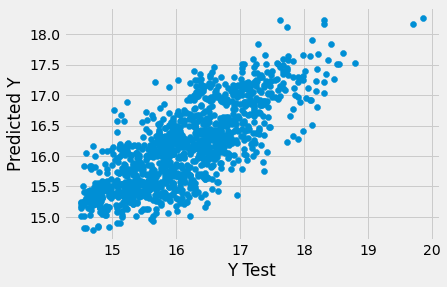

In [47]:
#scatter plot for y_test and predicted y
plt.scatter(y_test,y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Thus we successfully implemented "Linear Regression" Model on our "Mumbai House Price" Dataset.